In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import precision_score, recall_score

In [2]:
data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

In [5]:
data.drop(data[data.gender == 'Other'].index, inplace=True)
data.drop(['id', 'avg_glucose_level'], axis=1, inplace=True)

<Axes: >

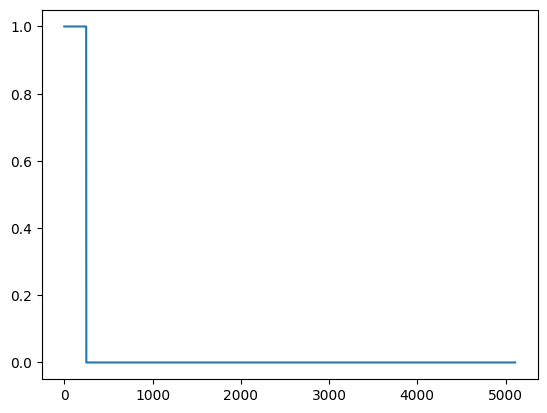

In [6]:
# Have a look at the distribution of "stroke" over the rows:
data.stroke.plot(kind='line')

### Defining the feature (X) and target (Y) frames:

In [7]:
Y = data[['stroke']]
X = data.drop('stroke', axis=1)

#Y.head(25)

print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

# Counting the values in 'stroke':
print(Y['stroke'].value_counts())

print(249/4860)


X.shape:  (5109, 9)
Y.shape:  (5109, 1)
stroke
0    4860
1     249
Name: count, dtype: int64
0.05123456790123457


In [8]:
#model = RandomForestClassifier(max_depth=15)
#model = RandomForestClassifier()
model = ExtraTreesClassifier()


categorical_cols = data.select_dtypes(include=[object]).columns

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop = 'if_binary'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough')

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)
                                ])

In [9]:
# X = X[:100]
# Y = Y[:100]

# Not actually doing this at the moment: 
#my_pipeline.fit(X, Y)

In [10]:
# predictions = my_pipeline.predict(X)
# print(precision_score(Y, predictions))
# print(recall_score(Y, predictions))
# print(classification_report(Y, predictions))


## Model evaluation, cross-validation: 

In [11]:
# Try evaluation: 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Save X_test for later:
X_test_clean = X_test.copy()
y_test_clean = y_test.copy()

# # # Initialize and train the RandomForestClassifier
# # clf = RandomForestClassifier(random_state=42)
# # clf.fit(X_train, y_train)

# # Scrap the cross-validation for a second
# # Specify cross-validation strategy
# cv_strategy = KFold(n_splits=5, random_state=42, shuffle=True)

# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(my_pipeline, X_train, y_train, cv=cv_strategy, scoring='accuracy')

# print(f"\nCV Scores: {cv_scores}")
# print(f"CV Mean Score: {cv_scores.mean()}\n")


# # You can still fit the pipeline to the entire training set and evaluate on the test set if needed
# my_pipeline.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = my_pipeline.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# conf_matrix = confusion_matrix(y_test, predictions)
# class_report = classification_report(y_test, predictions)

# print(f"\nAccuracy: {accuracy}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)

## Try oversampling:

Before oversampling:
X.shape:  (5109, 9)
Y.shape:  (5109, 1)

After oversampling:
X_over.shape:  (4754, 9)
Y_over.shape:  (4754, 1)

Counting the values in "Y[stroke]":
stroke
0    4860
1     249
Name: count, dtype: int64
Counting the values in "Y_over[stroke]":
stroke
1    2377
0    2377
Name: count, dtype: int64


ValueError: Input X contains NaN.
ExtraTreesClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

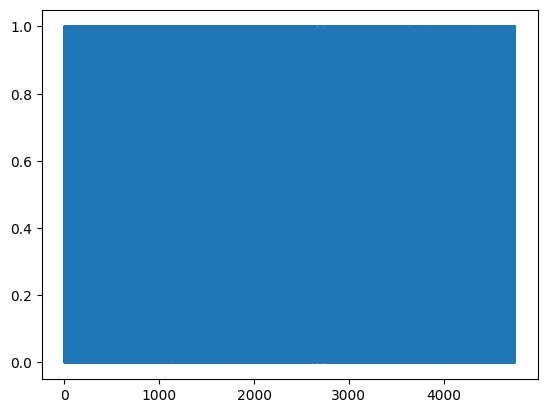

In [13]:
print("Before oversampling:")
print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

# Try oversampling: 
# 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
 
#print("Original class distribution:", Counter(Y))
# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

# Oversampling training data only:
X_over, Y_over = oversample.fit_resample(X_train, y_train)

#X_over = X_over[:5000]
#Y_over = Y_over[:5000]

Y_over.stroke.plot(kind='line')

print("\nAfter oversampling:")
print("X_over.shape: ", X_over.shape)
print("Y_over.shape: ", Y_over.shape)

# Counting the values in 'stroke':
print('\nCounting the values in "Y[stroke]":')
print(Y['stroke'].value_counts())
print('Counting the values in "Y_over[stroke]":')
print(Y_over['stroke'].value_counts())


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, Y_over, test_size=0.3, random_state=42)

# # Initialize and train the RandomForestClassifier
my_pipeline.fit(X_train, y_train)

# Make predictions on the test set
# predictions = my_pipeline.predict(X_test)
predictions = my_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

## Test new model/pipeline on old data: 


In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# # Initialize and train the RandomForestClassifier
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # Scrap the cross-validation for a second
# # Specify cross-validation strategy
# cv_strategy = KFold(n_splits=5, random_state=42, shuffle=True)

# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(my_pipeline, X_train, y_train, cv=cv_strategy, scoring='accuracy')

# print(f"\nCV Scores: {cv_scores}")
# print(f"CV Mean Score: {cv_scores.mean()}\n")


# You can still fit the pipeline to the entire training set and evaluate on the test set if needed
#my_pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = my_pipeline.predict(X_test_clean)

# Evaluate the model
accuracy = accuracy_score(y_test_clean, predictions)
conf_matrix = confusion_matrix(y_test_clean, predictions)
class_report = classification_report(y_test_clean, predictions)

print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.928897586431833
Confusion Matrix:
[[1415   53]
 [  56    9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1468
           1       0.15      0.14      0.14        65

    accuracy                           0.93      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.93      0.93      0.93      1533



In [ ]:
# Save model to pickle file: 
import joblib
joblib.dump(my_pipeline, '../data/Bjoern_model.pkl', compress = 1)

['../data/Bjoern_model.pkl']

In [ ]:
print('Just a test:')

a = np.array([3])
#a = [1, 2, 3, 4, 5]


#
print('a!') if a==1 else print('no!')

print(type(predictions[0]==0))

#print(predictions[0])

print(predictions)


Just a test:
no!
<class 'numpy.bool_'>
[0 0 0 ... 0 0 0]


In [ ]:
# Test predictions for small subset where stroke==1:
#stroketrue = pd.where(Y['stroke']==1)

#print(stroketrue)

print(Y)
print(Y['stroke']==1)

stroketrue = np.where(Y['stroke']==1)
print(stroketrue)

#X_stroketrue = X[stroketrue]
#X_stroketrue.shape

# predictions = my_pipeline.predict(X_stroketrue)

#print(precision_score(Y[stroketrue], predictions))
#print(recall_score(Y[stroketrue], predictions))


      stroke
0          1
1          1
2          1
3          1
4          1
...      ...
5105       0
5106       0
5107       0
5108       0
5109       0

[5109 rows x 1 columns]
0        True
1        True
2        True
3        True
4        True
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: stroke, Length: 5109, dtype: bool
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 1

In [ ]:
my_pipeline.steps[1][1].feature_importances_

array([3.33906051e-02, 3.99369912e-02, 1.34584450e-02, 8.31556717e-05,
       1.56994511e-02, 1.39680279e-02, 1.03842752e-02, 2.80231881e-02,
       1.24598601e-02, 1.22514708e-02, 1.75666545e-02, 1.65007522e-02,
       4.63251820e-01, 3.28642071e-02, 3.23014609e-02, 2.57859635e-01])

In [ ]:
my_pipeline[:-1].get_feature_names_out()

array(['cat__gender_Male', 'cat__ever_married_Yes',
       'cat__work_type_Govt_job', 'cat__work_type_Never_worked',
       'cat__work_type_Private', 'cat__work_type_Self-employed',
       'cat__work_type_children', 'cat__Residence_type_Urban',
       'cat__smoking_status_Unknown',
       'cat__smoking_status_formerly smoked',
       'cat__smoking_status_never smoked', 'cat__smoking_status_smokes',
       'remainder__age', 'remainder__hypertension',
       'remainder__heart_disease', 'remainder__bmi'], dtype=object)

In [ ]:
# just an attempt on the two most important features
Xtrain = X[['age','bmi']]
model.fit(Xtrain, Y)
print(precision_score(Y, model.predict(Xtrain)))
print(recall_score(Y, model.predict(Xtrain)))

/home/hrbjoern/anaconda3/envs/streamlit_2024-07-23/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9054726368159204
0.7309236947791165


In [ ]:
single_case = pd.DataFrame(['Male', 40.0, 0, 0, 1, 'Self-employed', 'Urban', 16, 'formerly smoked']).T
single_case.columns = X.columns
single_case = single_case.astype({'age': float, 'hypertension': int, 'heart_disease': int, 'bmi': float})
#single_case.hypertension.astype(int)
#single_case.heart_disease.astype(int)
#single_case.bmi.astype(float)
single_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1 non-null      object 
 1   age             1 non-null      float64
 2   hypertension    1 non-null      int64  
 3   heart_disease   1 non-null      int64  
 4   ever_married    1 non-null      object 
 5   work_type       1 non-null      object 
 6   Residence_type  1 non-null      object 
 7   bmi             1 non-null      float64
 8   smoking_status  1 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 204.0+ bytes


In [ ]:
my_pipeline.predict(single_case)

ValueError: Found unknown categories [1] in column 1 during transform

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5109 non-null   object 
 1   age             5109 non-null   float64
 2   hypertension    5109 non-null   int64  
 3   heart_disease   5109 non-null   int64  
 4   ever_married    5109 non-null   object 
 5   work_type       5109 non-null   object 
 6   Residence_type  5109 non-null   object 
 7   bmi             4908 non-null   float64
 8   smoking_status  5109 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 528.2+ KB
